<a href="https://colab.research.google.com/github/mahirafserpavel/PRODIGY_ML_01/blob/main/LInearRegression_three_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checking Missing values

Missing values in each column in TRAIN:
Series([], dtype: int64)

Missing values in each column in TEST:
Series([], dtype: int64)


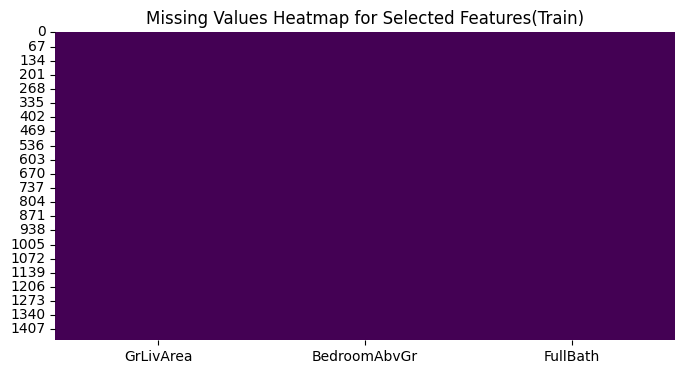

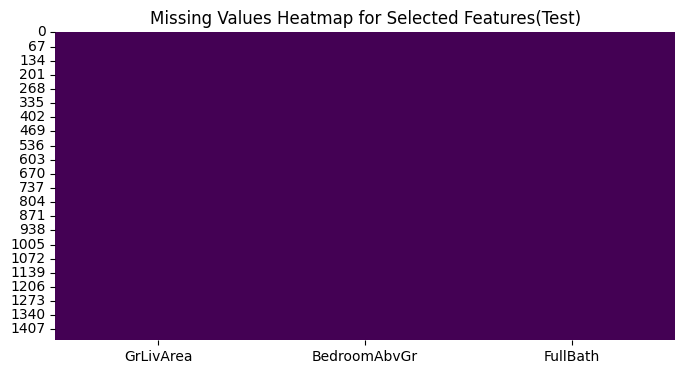

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the training data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Select the specific columns
Train = train[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
Test = test[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Check for missing values
missing_values = Train.isnull().sum()
print("Missing values in each column in TRAIN:")
print(missing_values[missing_values > 0])

missing_values = Test.isnull().sum()
print("\nMissing values in each column in TEST:")
print(missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(8, 4))
sns.heatmap(Train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap for Selected Features(Train)")
plt.show()
plt.figure(figsize=(8, 4))
sns.heatmap(Test.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap for Selected Features(Test)")
plt.show()

# Outliers handling

In [2]:
import pandas as pd
import numpy as np

# Function to find outliers using IQR method and replace them with median
def replace_outliers_with_median(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    for col in data.columns:
        data[col] = np.where(data[col] < lower_bound[col], data[col].median(), data[col])
        data[col] = np.where(data[col] > upper_bound[col], data[col].mean(), data[col])
    return data

# Load the training data
train = pd.read_csv('train.csv')

# Select the specific columns for training
X_train = train[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Replace outliers in training data
X_train_cleaned = replace_outliers_with_median(X_train)

# Load the test data
test = pd.read_csv('test.csv')

# Select the specific columns for test
X_test = test[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Replace outliers in test data
X_test_cleaned = replace_outliers_with_median(X_test)

<ipython-input-2-7a37fe6be60c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] < lower_bound[col], data[col].median(), data[col])
<ipython-input-2-7a37fe6be60c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] > upper_bound[col], data[col].mean(), data[col])
<ipython-input-2-7a37fe6be60c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

# Target values Distribution

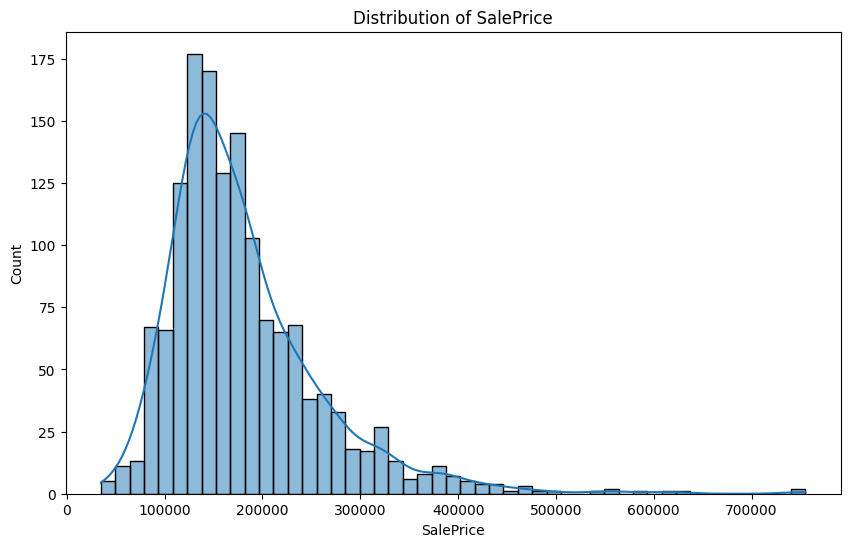

In [3]:
X = train[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = train['SalePrice']

# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

# Scaling

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
# Load the training data
test = pd.read_csv('test.csv')

# Select the specific columns
features_test_cleaned = test[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
X_test_scaled = scaler.transform(X_test_cleaned)

In [5]:
X.shape

(1459, 3)

In [6]:
features_test_cleaned.shape

(1459, 3)

In [7]:
# Load the training data
test = pd.read_csv('sample_submission.csv')
target_test = test['SalePrice']

# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y)

LinearRegression()

# Checking metrics

In [9]:
# Predict on the training data
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate metrics
mse_train = mean_squared_error(y, y_pred_train)
r2_train = r2_score(y, y_pred_train)
mse_test = mean_squared_error(target_test, y_pred_test)
r2_test = r2_score(target_test, y_pred_test)

# Display metrics
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R-squared (R²) Score: {r2_train}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared (R²) Score: {r2_test}")

Training Set Metrics:
Mean Squared Error (MSE): 3405227697.461765
R-squared (R²) Score: 0.46037378153706476

Test Set Metrics:
Mean Squared Error (MSE): 2347363549.318086
R-squared (R²) Score: -7.608892111496855


In [10]:
y.shape

(1459,)

In [11]:
y_pred_train.shape

(1459,)

In [12]:
target_test.shape

(1459,)

In [13]:
y_pred_test.shape

(1459,)

# Ploting Linear line

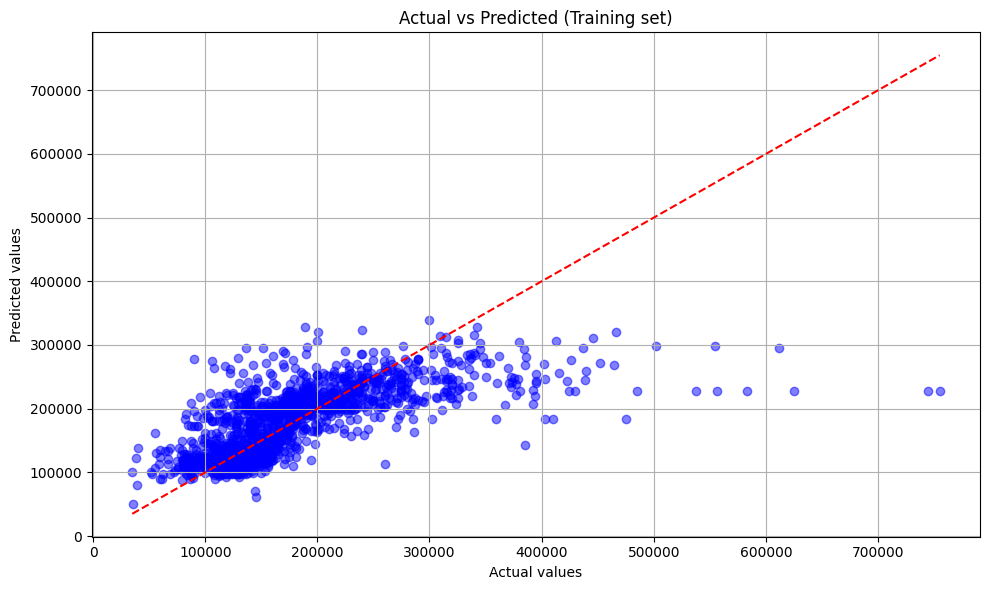

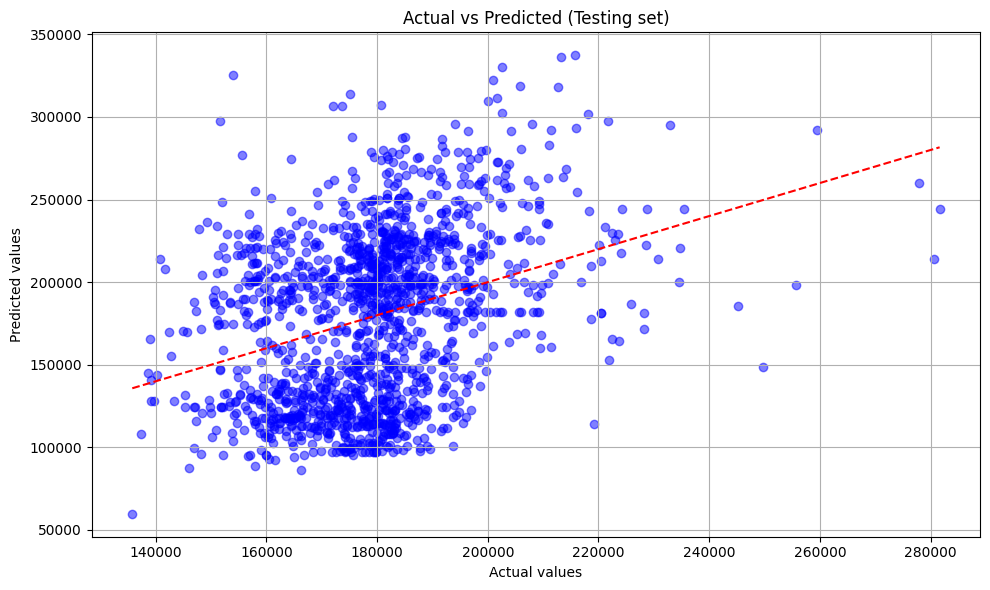

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train and y_pred_train are already defined

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_train, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Actual vs Predicted (Training set)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(target_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted (Testing set)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.tight_layout()
plt.show()